In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv('../data/dataset.csv')

print(f"Total: {df.shape[0]}")
df.head()

Total: 114023


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


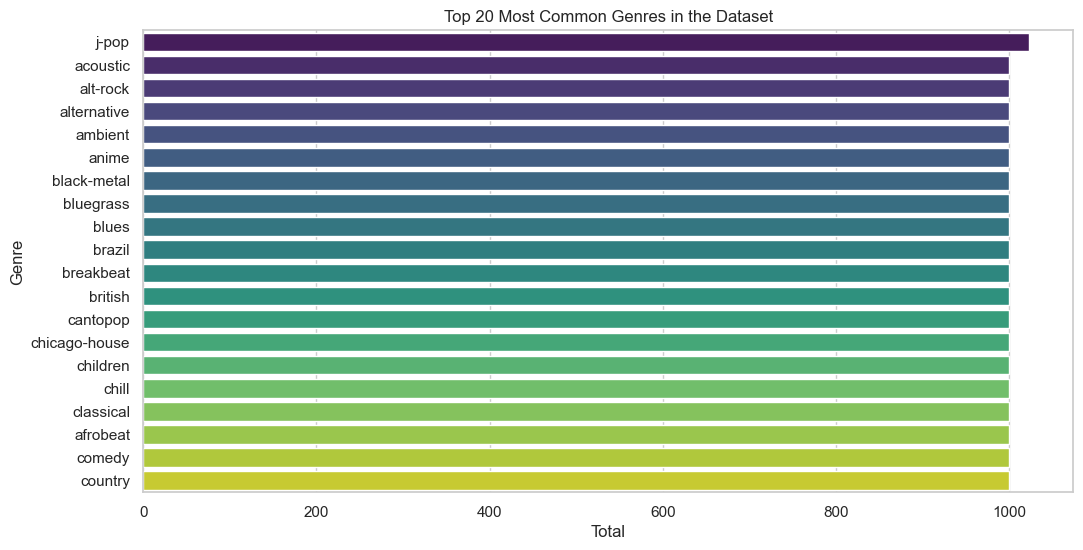

In [2]:
top_genres = df['track_genre'].value_counts().head(20)
plt.figure(figsize=(12, 6))

sns.barplot(
    x=top_genres.values, 
    y=top_genres.index, 
    hue=top_genres.index,  
    legend=False,         
    palette="viridis"
)

plt.title('Top 20 Most Common Genres in the Dataset')
plt.xlabel('Total')
plt.ylabel('Genre')
plt.show()

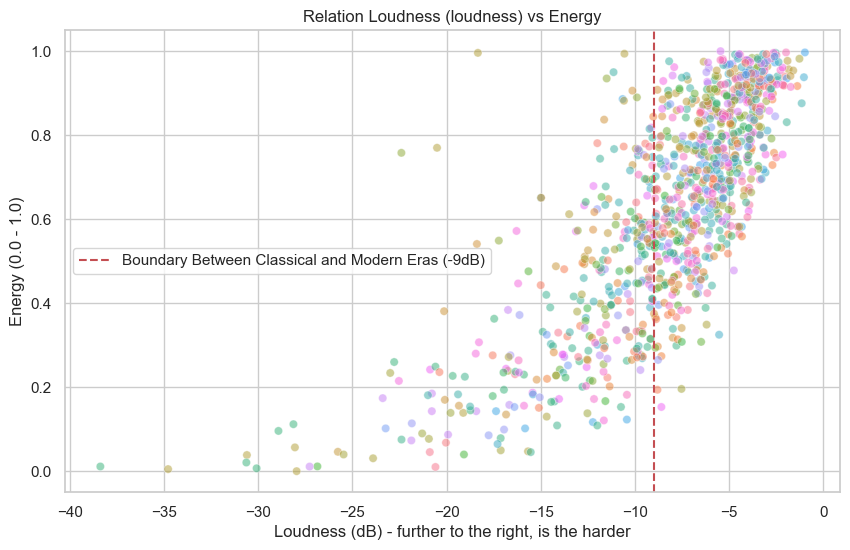

In [3]:
plt.figure(figsize=(10, 6))

sample_df = df.sample(1000, random_state=42)

sns.scatterplot(data=sample_df, x='loudness', y='energy', alpha=0.5, hue='track_genre', legend=False)

plt.title('Relation Loudness (loudness) vs Energy')
plt.xlabel('Loudness (dB) - further to the right, is the harder')
plt.ylabel('Energy (0.0 - 1.0)')
plt.axvline(x=-9, color='r', linestyle='--', label='Boundary Between Classical and Modern Eras (-9dB)')
plt.legend()
plt.show()

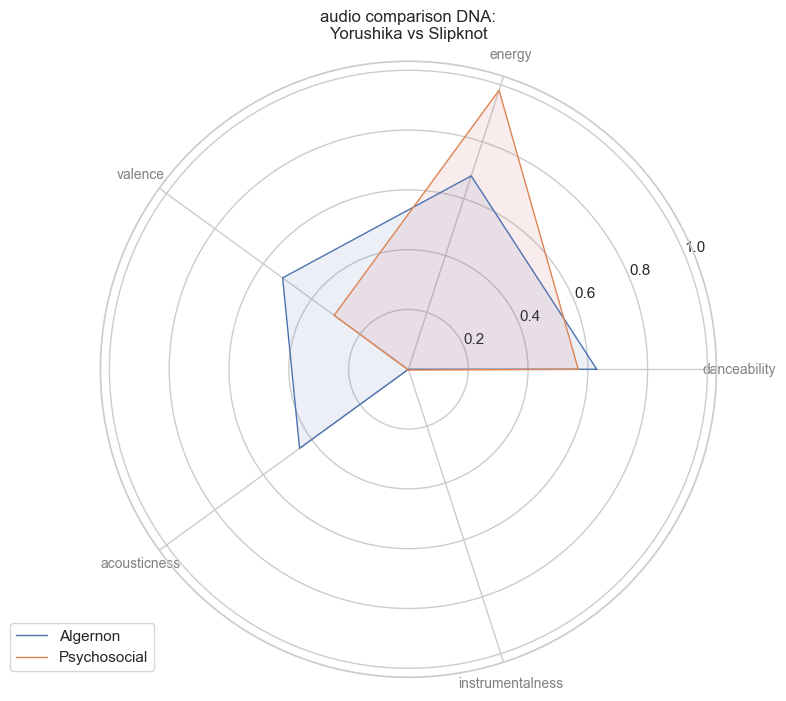

In [4]:
from math import pi

def plot_radar_comparison(song1_name, song2_name):
    features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']
    
    try:
        mask1 = df['track_name'].str.contains(song1_name, case=False, na=False)
        if not mask1.any():
            print(f"song '{song1_name}' not found.")
            return
        s1 = df[mask1].iloc[0]
        
        mask2 = df['track_name'].str.contains(song2_name, case=False, na=False)
        if not mask2.any():
            print(f"song '{song2_name}' not found.")
            return
        s2 = df[mask2].iloc[0]
        
    except Exception as e:
        print(f"an error occured: {e}")
        return

    values1 = s1[features].values.flatten().tolist()
    values2 = s2[features].values.flatten().tolist()
    
    values1 += values1[:1]
    values2 += values2[:1]
    
    angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
    angles += angles[:1]
    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1], features, color='grey', size=10)
    
    ax.plot(angles, values1, linewidth=1, linestyle='solid', label=s1['track_name'])
    ax.fill(angles, values1, 'b', alpha=0.1)
    
    ax.plot(angles, values2, linewidth=1, linestyle='solid', label=s2['track_name'])
    ax.fill(angles, values2, 'r', alpha=0.1)
    
    plt.title(f"audio comparison DNA:\n{s1['artists']} vs {s2['artists']}")
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

plot_radar_comparison("Algernon", "Psychosocial")